In [294]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Diabetest Project
### Goal: Be able to preduct the Diabetes outcome based on some key metrics
### Type: This appears to be a labeling task, classification problem

In [295]:
def load_data(file_name):
    csv_path = file_name
    return pd.read_csv(csv_path)

raw_data = load_data('diabetes.csv')

In [296]:
raw_data.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


In [297]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
Pregnancies                 768 non-null int64
Glucose                     768 non-null int64
BloodPressure               768 non-null int64
SkinThickness               768 non-null int64
Insulin                     768 non-null int64
BMI                         768 non-null float64
DiabetesPedigreeFunction    768 non-null float64
Age                         768 non-null int64
Outcome                     768 non-null int64
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001DB57100248>,
      dtype=object)

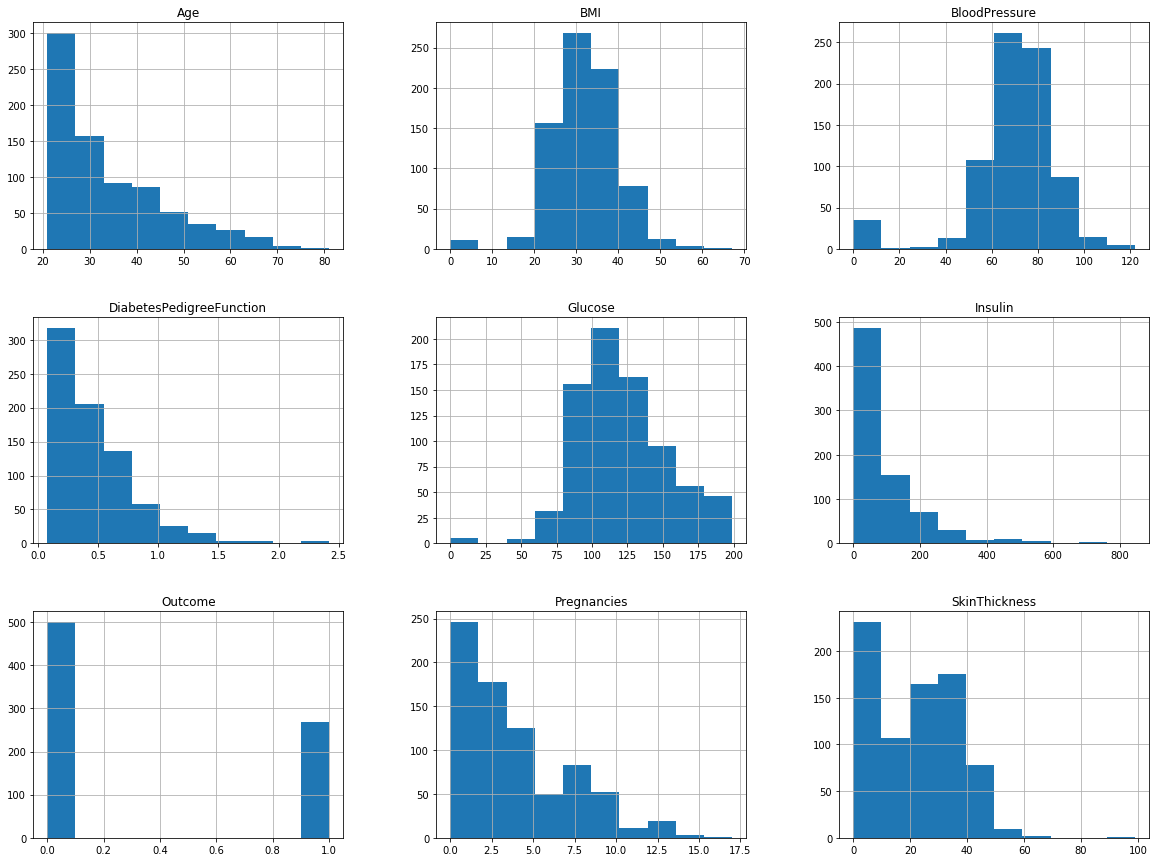

In [298]:
raw_data.hist(figsize=(20,15))

## Analysis of histograms

##### It looks like some values are missing. These values are SkinThickness, Insulin, Glucose, BloodPressure, BMI and DiabetesPedigreeFunction. These values seem to have been filled in with zeros, so therefore we must insert an imputer.

In [299]:
raw_data['Glucose'].drop(0)

raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
Pregnancies                 768 non-null int64
Glucose                     768 non-null int64
BloodPressure               768 non-null int64
SkinThickness               768 non-null int64
Insulin                     768 non-null int64
BMI                         768 non-null float64
DiabetesPedigreeFunction    768 non-null float64
Age                         768 non-null int64
Outcome                     768 non-null int64
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [300]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='median')

imputer.fit(raw_data)

print(imputer.statistics_)


# raw_data['Glucose'] = raw_data['Glucose'].drop(0)
# raw_data['SkinThickness'] = raw_data['SkinThickness'].drop(0)
# raw_data['Insulin'] = raw_data['Insulin'].drop(0)
# raw_data['BMI'] = raw_data['BMI'].drop(0)
# raw_data['DiabetesPedigreeFunction'] = raw_data['DiabetesPedigreeFunction'].drop(0)

raw_data['Glucose'] = raw_data['Glucose'].replace(0,raw_data['Glucose'].mean())
raw_data['SkinThickness'] = raw_data['SkinThickness'].replace(0, raw_data['SkinThickness'].mean())
raw_data['Insulin'] = raw_data['Insulin'].replace(0, raw_data['Insulin'].mean())
raw_data['BMI'] = raw_data['BMI'].replace(0, raw_data['BMI'].mean())
raw_data['DiabetesPedigreeFunction'] = raw_data['DiabetesPedigreeFunction'].replace(0, raw_data['DiabetesPedigreeFunction'].mean())

#imputer.statistics_

[  3.     117.      72.      23.      30.5     32.       0.3725  29.
   0.    ]


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
Pregnancies                 768 non-null int64
Glucose                     768 non-null float64
BloodPressure               768 non-null int64
SkinThickness               768 non-null float64
Insulin                     768 non-null float64
BMI                         768 non-null float64
DiabetesPedigreeFunction    768 non-null float64
Age                         768 non-null int64
Outcome                     768 non-null int64
dtypes: float64(5), int64(4)
memory usage: 54.1 KB


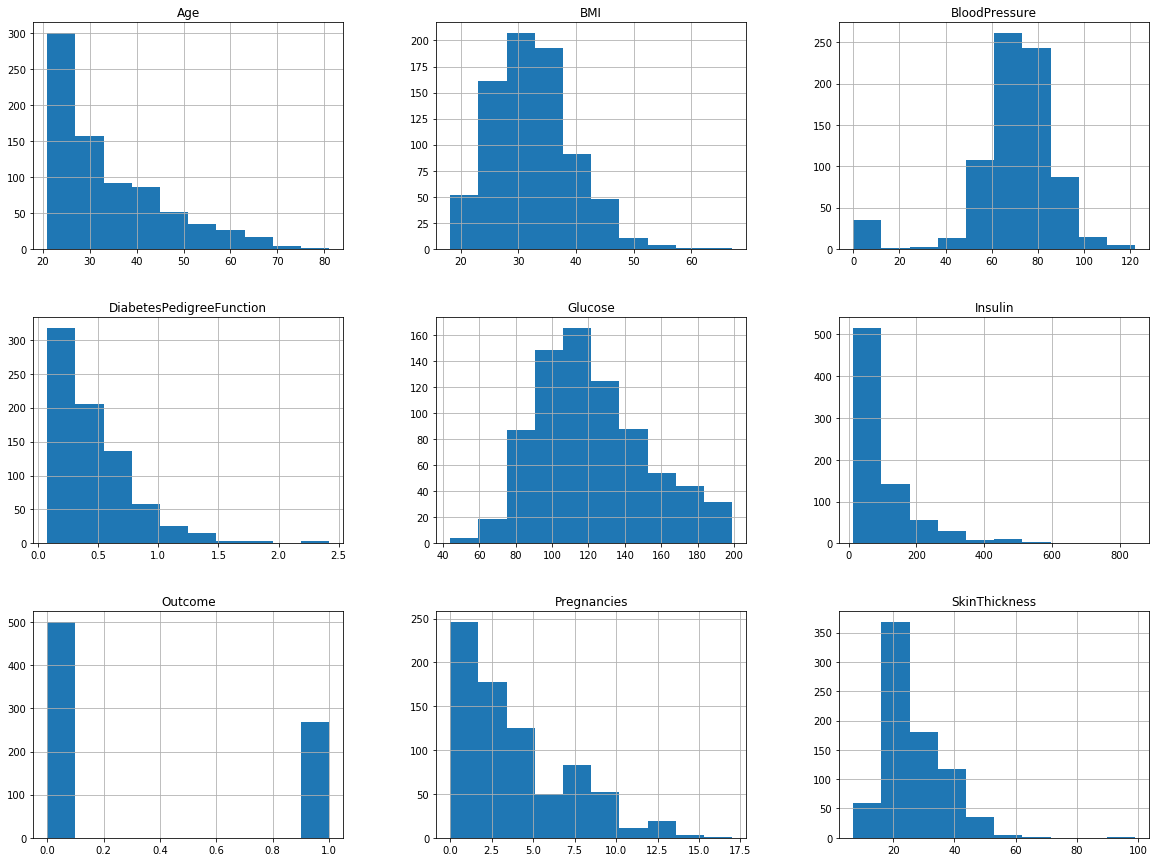

In [301]:
raw_data.hist(figsize=(20,15))

raw_data.info()

<function matplotlib.pyplot.show(*args, **kw)>

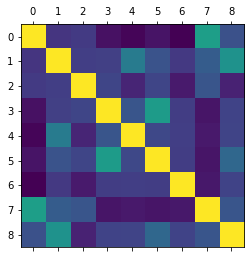

In [316]:
from pandas.plotting import scatter_matrix

data_set = raw_data.drop(['Outcome'],axis=1)
data_outcome = raw_data['Outcome']


corr_data = raw_data.corr()

corr_data['Outcome'].sort_values(ascending=False)

plt.matshow(corr_data)
plt.show

# scatter_matrix(df_p1[attributes], figsize=(12, 8))

In [303]:
# Make a training set and a testing set

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data_set, data_outcome, test_size = 0.2, random_state =42)

In [304]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

scale_X_train = scaler.fit_transform(X_train)
scale_X_test = scaler.transform(X_test)


In [305]:
from sklearn.linear_model import SGDClassifier

trainer = SGDClassifier()

trainer.fit(scale_X_train, y_train)



SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge',
              max_iter=1000, n_iter_no_change=5, n_jobs=None, penalty='l2',
              power_t=0.5, random_state=None, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)

In [306]:

svc_clf_predictions_train = trainer.predict(scale_X_train)

svc_clf_predictions_test = trainer.predict(scale_X_test)

svc_clf_predictions_train

array([1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1,
       0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0,

In [ ]:
# Do some GridSearching

In [307]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

def get_stats(predictions, actual):
    confusion = confusion_matrix(actual,predictions)
    accuracy = accuracy_score(actual,predictions)
    precision = precision_score(actual,predictions)
    recall = recall_score(actual,predictions)
    f1 = f1_score(actual,predictions)

    return confusion, accuracy, precision, recall, f1

confusion, accuracy, precision, recall, f1 = get_stats(svc_clf_predictions_test,y_test)

print(accuracy)
print(precision)
print(recall)
print(f1)
confusion

0.7597402597402597
0.6956521739130435
0.5818181818181818
0.6336633663366337


array([[85, 14],
       [23, 32]], dtype=int64)